<table align="left" style="border-style: hidden" class="table"> <tr> <td class="col-md-2"><img style="float" src="http://prob140.org/assets/icon256.png" alt="Prob140 Logo" style="width: 120px;"/></td><td><div align="left"><h3 style="margin-top: 0;">Probability for Data Science</h3><h4 style="margin-top: 20px;">UC Berkeley, Spring 2019</h4><p>Ani Adhikari, Jim Pitman, Dibya Ghosh, and Jason Zhang</p>CC BY-NC-ND 4.0</div></td></tr></table>

In [6]:
format(0.5**52 + 1.32421875, '.100f')

'1.3242187500000002220446049250313080847263336181640625000000000000000000000000000000000000000000000000'

# Lab 1: Birthday Attack #
Welcome to lab in Prob 140! In this first lab you will get acquainted with the computing environment of the course and explore an application of the birthday problem. Specifically, you will:
- Review the code used in class to study the birthday problem on Planet Earth
- Study the "birthday paradox" on Mars (or, if you have a more practical outlook, in hashing collisions), with an exact computation as well as an approximation
- See how the title of this lab is actually a thing, not just a cutesy way of getting your attention.

First run the Setup cell below. You can ignore its contents for now if you aren't interested. In future labs, this cell will appear before the start of each lab.

In [1]:
# SETUP

import numpy as np
from datascience import *
from prob140 import *

# These lines do some fancy plotting magic
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# These lines make warnings look nicer
import warnings
warnings.simplefilter('ignore', FutureWarning)

### Instructions

Your labs have two components: a written portion and a portion that also involves code.  Written work should be completed on paper, and coding questions should be done in the notebook.  You are welcome to LaTeX your answers to the written portions, but staff will not be able to assist you with LaTeX related issues. It is your responsibility to ensure that both components of the lab are submitted completely and properly to Gradescope. Refer to the bottom of the notebook for submission instructions.

### Useful Methods ###
Because you have only recently returned to school after the holiday break, we are providing a list of some methods that will be useful in the lab. Please consult the one-page [code reference sheet](http://prob140.org/assets/final_reference_code.pdf) in [Resources](http://prob140.org/references/) if you need a reminder of the syntax.

For today's lab you will need some or all of:
- Array operations and NumPy functions
- Defining functions: `def`
- Conditional statements: `if`/`else`
- Iteration: `for` (or any other Python method for iteration)
- `Table` methods from the `datascience` library:
    - Creation: `with_column` and `with_columns`
    - Accessing rows that satisfy a condition: `where`
    - Accessing and using values as inputs to a function: `apply`
    - Scatter plots: `scatter`

## Part 1: Birthday Paradox on Earth ##
In this part you will review the code used in class to study the birthday problem on Planet Earth.

As you have seen, the setting of the birthday problem is a special case of $n$ draws made at random with replacement from the set of integers $1, 2, 3, \ldots, N$. 

In the context of birthdays on Earth, this corresponds to two simplifying assumptions about $n$ people:
- Each year has 365 days; $N = 365$
- Each person is equally likely to be born on each of the 365 days, regardless of the birthdays of all others

The main question is, "What is the chance that among the $n$ people there is at least one pair whose birthdays are the same?" 

In the context of hashing, the question is, "If you assign each of $n$ individuals one of $N$ hash values chosen at random, what is the chance of at least one collision?" 

Start out by setting $N = 365$. Run the cell or it won't get set. After this, we won't keep reminding you to run cells.

In [2]:
N = 365

### 1a) ###
Let $D_n$ be the event that all $n$ birthdays are different, that is, the event that there is no match. You saw in class that
$$
P(D_n) ~ = ~ \prod_{i=0}^{n-1} \frac{365 - i}{365}
$$

Notice that $P(D_1) = 1$. There is certain to be no match if there is only one birthday, because there is nothing it can be matched with.

Notice also that the computation labels the $n$ people as $0, 1, 2, \ldots, n-1$, which makes Python's 0-origin indexing rather convenient. 

Let's brush off any cobwebs that might have gathered on your programming skills over the holidays. Run the cells below and observe the output carefully.

In [3]:
n = 5
individuals = np.arange(n)
individuals

array([0, 1, 2, 3, 4])

In [4]:
N - individuals

array([365, 364, 363, 362, 361])

In [5]:
(N - individuals)/N

array([1.        , 0.99726027, 0.99452055, 0.99178082, 0.9890411 ])

In [6]:
np.prod( (N - individuals)/N )

0.9728644263002065

### 1b) ###
Use the sequence of steps in 1a to define a function `p_no_match` that takes $n$ as its argument and returns $P(D_n)$, assuming the fixed value $N = 365$.

In [7]:
def p_no_match(n):
    individuals = np.arange(n)
    return np.prod((N - individuals) / N)

### 1c) ###
Based on what you saw in class about the birthdays of 23 people, $P(D_{23})$ should be

(i) a bit less than 1/2 $~~~~~~~~~~$ (ii) 1/2 $~~~~~~~~~~$ (iii) a bit more than 1/2

Pick the right option and explain without computation.

(i) a bit less than 1/2

In class we have seen that 1 - $P(D_{23})$, which is the chance that there is at least one collision of birthdays among 23 people, lies between 0.5 and 0.51. So it is greater than 1/2. Hence, it means that $P(D_{23})$ would be a little less than 1/2.  

Confirm your answer in the cell below.

In [8]:
p_no_match(23)

0.4927027656760144

### 1d) ###

The birthday problem is only interesting for $1 \le n \le N$, because for larger $n$ it's clear that $P(D_n)$ must be 0. Use a table to display your value of $P(D_n)$ for every $n$ in the range 1 through $N$, in the following steps.

The next cell sets up a table of all the possible numbers of people.

In [11]:
birthday_probs = Table().with_column('People', np.arange(1, N+1))
birthday_probs

People
1
2
3
4
5
6
7
8
9
10


Create an array called `all_different` that contains $P(D_n)$ for each $n$ in the range 1 through $N$.

You will need the Table method ``apply`` that applies a function to a specified column in each row of a table.

In [19]:
all_different = birthday_probs.apply(p_no_match, 'People')

Which item of `all_different` corresponds to 23 people? That item of `all_different` should agree with 1c; check this!

In [20]:
all_different.item(22)

0.4927027656760144

Augment `birthday_probs` with two columns 
- one labeled ``P(no match)``; in the row corresponding to $n$ people, the column should contain $P(D_n)$
- one labeled ``P(at least one match)``; in the row corresponding to $n$ people, the column should contain $P(\mbox{at least one match among the } n \mbox{ birthdays})$ 

In [21]:
birthday_probs = birthday_probs.with_columns(
    'P(no match)', all_different,
    'P(at least one match)', 1 - all_different
)

birthday_probs

People,P(no match),P(at least one match)
1,1,0
2,0.99726,0.00273973
3,0.991796,0.00820417
4,0.983644,0.0163559
5,0.972864,0.0271356
6,0.959538,0.0404625
7,0.943764,0.0562357
8,0.925665,0.0743353
9,0.905376,0.0946238
10,0.883052,0.116948


Compare with the `results` table in [Section 1.4](http://prob140.org/textbook/chapters/Chapter_01/04_Birthday_Problem) of the Prob 140 textbook. It should be the same apart from column labels. 

### 1e) ###
Now visualize the "birthday paradox". Draw the scatter plot of `P(at least one match)` versus `People`. 

In the cell below, we have restricted the values of `People` to just the range where there is visible change in the probability being plotted. And we have drawn a horizontal line at the level 1/2. The code for the graphics is briefly explained in the comments. The final semi-colon prevents some unnecessary text output from `matplotlib`.

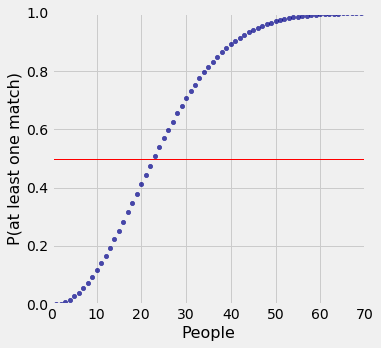

In [23]:

birthday_probs.scatter('People', 'P(at least one match)')

# Everything below this line is for fine-tuning the graphics.
# There is nothing for you to enter below this line.

# plt is short for matplotlib.pyplot; see the import cell at the top

plt.xlim(0, 70)     # restrict trials to at most 70

plt.ylim(0, 1)      # use the probability scale on the vertical axis

# Draw a red horizontal line at level 1/2
# plt.plot joins the dots between the two points (x_1, y_1) and (x_2, y_2)
# Arguments: [x_1, x_2], [y_1, y_2], color=, and lw=
# That last one is line width. Bigger values produce thicker lines.

plt.plot([0, 70], [0.5, 0.5], color='red', lw=1);

Use the graph to indentify the smallest number of people at which $P(\mbox{at least one match})$ exceeds 1/2.

The value of 'People' where the red horizontal line crosses the graph is around 22 ~ 23. 
Hence, it is safe to assume that 23 would be the smallest number of people where P(at least one match) exceeds 1/2.

## Part 2: Birthday Paradox (Martian Edition) ##
Now suppose you're a Martian. Then one year on your planet is 687 days long. Or in general, suppose you're from a planet whose year has $N$ days. The goal of this part is to answer the following question:

For a year of length $N$, what is the smallest number of individuals so that the chance of a match among those individuals is at least half?

In terms of a hash table with $N$ values, you are trying to find the smallest number of individuals so that a collision is more likely than not. 

We'll call this number the *tipping point* corresponding to a hash table with $N$ values.

In this part you will write a function to find the tipping point as a function of $N$. To gain some efficiency in the code, the steps below avoid Table methods; those work better for display, visualization, and so on.

### 2a) [On Paper]###
Based on the tipping point for the Earth year (23, with $N = 365$), you should have the sense that the tipping point is going to be small relative to $N$. Here are a couple of observations that will help you write your function.

First review the formula for $P(D_n)$ in 1a. This is the probability of no match among $n$ people.

Fill in the blank with the correct factor:

For $2 \le n \le N$,
$$
P(D_n) ~ = ~ P(D_{n-1}) \cdot \underline{ ~~~~~~~~~~~~~~~~ }
$$

If you have trouble, start with $N = 365$ and refer to 1a. What will happen if you replace $n$ by $n-1$?

In what follows, keep in mind that:

- $P(D_1) = 1$
- The smallest $n$ for which $P(\mbox{at least one match among } n \mbox{ birthdays}) > 1/2$ is also the smallest $n$ for which $P(D_n) < 1/2$.

### 2b) ###
Use 2a to define a function called `tipping_point` that takes $N$ as its argument and returns the tipping point when there are $N$ days in the year.

Do **not** compute $P(D_n)$ for all $n$. The vast majority of that computation will be unnecessary. Rather, set up your computation in the steps indicated by 2a:

- Start with one individual and probability 1 of no match.
- As long as the probability is greater than 1/2, keep increasing the number of individuals by 1 and updating the probability of no match by the product formula you came up with in 2a.
- Once the probability is less than 1/2, return (carefully!) the number of individuals corresponding to the tipping point.

There are numerous ways to write this function. Use any efficient way; this implies avoiding Table here.

In [35]:
def tipping_point(N):
    nn = 1
    prob = 1 
    
    while prob >= 1/2:
        prob *= ((N - nn)/N)
        nn += 1
    
    return nn

Run the cell below as a check of whether your function is working correctly.

In [25]:
tipping_point(365)

23

### 2c) ###
What's the tipping point on Mars?

In [36]:
tipping_point(687)

32

### 2d) ###
If you use a 16-bit hash, there are $2^{16} = 65536$ hash values. What is the tipping point for a 16-bit hash?

In [27]:
tipping_point(65536)

302

**Optional:** If you use a 32-bit hash there are $2^{32} \approx 4.3 \times 10^9$ hash values. If you wrote your function reasonably efficiently, it should give you the tipping point for a 32-bit hash after some chugging, without crashing your system. But please only try it after letting course staff look at your code for `tipping_point`. It's not a required element of the lab.

In [28]:
# OPTIONAL

tipping_point(2**32)

77164

## 3. An Exponential Approximation ##
If you use a 64-bit hash there are approximately $1.8 \times 10^{19}$ hash values. It might be cruel to ask a computer to crank out your `tipping_point` value for such a large $N$.

But in class we derived an exponential approximation to the chance of no match, which you can now use to approximate the tipping point.

Review the approximation in Step 4 of [Section 1.5](http://prob140.org/textbook/chapters/Chapter_01/05_An_Exponential_Approximation) of the Prob 140 textbook. In lecture we saw where it comes from. You should review the math that went into the approximation, but for this lab it is enough just to know the final answer:

For large $n$, 
$$
P(D_n) ~ \approx ~ e^{-\frac{1}{2N}n^2}
$$

### 3a) ###
To get a rough approximation to the tipping point, set $P(D_n)$ to $1/2$ in the approximation above and solve for $n$ in terms of $N$. Do this on scratch paper. Then write a function called `approx_tipping_point` that takes $N$ as its argument and returns the approximate tipping point.

Use `np.log(x)` for $\log(x)$ and the ceiling function `np.ceil(x)` for the smallest integer greater than or equal to $x$.

In [30]:
def approx_tipping_point(N):
    return np.ceil((-np.log(1/2) * 2*N)**(1/2))

## 3b) ##
Run the cell below and compare with the exact answers you got in Part 2. Keep in mind that all the calculations might be affected by floating point accuracy issues.

In [31]:
approx_tipping_point(365), approx_tipping_point(687), approx_tipping_point(2**16)

(23.0, 31.0, 302.0)

### 3c) ###
What's the approximate tipping point for a 128-bit hash?

In [37]:
approx_tipping_point(1.8*10**19)

4995327667.0

## Part 4: The Attack ##
Hash functions play a major role in cryptography and computer security. For example, servers verify passwords by comparing the hash value of an entered string with the hash value stored in a database. *Birthday attacks* take advantage of the birthday paradox to generate hash collisions and trick computers into accepting a malicious file in place of a previously-encountered safe file. 

The key idea behind birthday attacks is what you have observed in this lab: by making a relatively small number (the tipping point!) of random attempts, the attacker has more than an even chance of matching a hash value that has been assigned. 

Note that the attackers don't aim to collide with a *specific* hash value—they just try for a collision with any assigned value. In other words, the goal is to get any match, just as in the birthday problem. 

### 4a) ###
Take a look at the [Wikipedia page on birthday attacks](https://en.wikipedia.org/wiki/Birthday_attack). Scroll down to the table in the middle of the article. 

The notation $H$ in the second column is what we are calling $N$. 

We have been looking for an essentially 50% chance of getting a match, so you can just focus on the 50% column under Desired Probability of a Random Collision. 

Are your approximations in Part 3 consistent with the entries in this column?

Yes, assuming the values on the table is rounded to the nearest 10th or 100th value. My approximations are consistent. 

### 4b) [On Paper] ###
Now scroll down the Wikipedia page and look at the section called Simple Approximation. In this exercise you will figure out what's going on in the first stated approximation

$$
p(n) ~ \approx ~ \frac{n^2}{2H}
$$

Here $p(n)$ is the desired chance of a match, so for our purposes it's 0.5. And $H$ is what we're calling $N$. So in our notation, the approximation is

$$
0.5 ~ \approx ~ \frac{n^2}{2N}
$$

That is indeed simple; simpler than the approximation you used in 3a. What's going on? Where did the $e$ go?

You will soon work that out, but first note that quantities can be approximated in mulitple different ways. In 3a, you found one very good approximation to the tipping point. Wikipedia has another. 

**Show** how Wikipedia's approximation can be derived from the one in Part 3. Use 0.5 in place of the more general $p(n)$.

**Note:** The [Exponential and Log Functions](http://prob140.org/resources/exponential_approximations/) reference in [Resources](http://prob140.org/references/) will be helfpul, as will the Exponential Approximations section of the [math prerequisite exercises](http://prob140.org/assets/prereq.pdf).

### 4c) [On Paper] ###
Use the formula in 4b to get a very simple approximation for the tipping point when there are $N$ values in all.

### 4d) ###
Compute this new approximation for the tipping point in the cases $N = 365$, $N = 687$, and a 16-bit hash.

In [38]:
365**(1/2), 687**(1/2)

(19.1049731745428, 26.210684844162312)

Compare with the exact answers in Part 2 and your original approximations in Part 3. The new approximation is a bit rough. But it gives a good ballpark estimate when $N$ is very large, and it's hard to beat for simplicity.

#### Further Reading #### 
To test whether their cryptographic hash functions are safe from attack, tech companies have to try to break them. Just last year, security researchers at Google generated a hash collision using SHA-1, a widely used hashing algorithm that generates 160-bit hash values. If you are interested in learning more, take a look at Google's technical report:
https://security.googleblog.com/2017/02/announcing-first-sha1-collision.html. Their recommendation after generating the collision: "For the tech community, our findings emphasize the necessity of sunsetting SHA-1 usage."

## Conclusion ##
You now know:
- What a birthday attack is, at least in a rough sense
- Roughly how many random attempts have to be made for a collision to be more likely than not, as a function of the number of values in the hash table
- That problems involving artificial settings such as birthdays can have considerably wider practical applications
- That exponential approximations can be great as approximations and also as ways to get a quick sense of how a complicated function is behaving

You have completed your first Prob 140 lab. Congratulations!

## Submission Instructions ##

Many assignments throughout the course will have a written portion and a code portion. Please follow the directions below to properly submit both portions.

### Written Portion ###
*  Scan all the pages into a PDF. You can use any scanner or a phone using applications such as CamScanner. Please **DO NOT** simply take pictures using your phone. 
* Please start a new page for each question. If you have already written multiple questions on the same page, you can crop the image in CamScanner or fold your page over (the old-fashioned way). This helps expedite grading.
* It is your responsibility to check that all the work on all the scanned pages is legible.

### Code Portion ###
* Save your notebook using File > Save and Checkpoint.
* Run the cell below to generate a PDF file.
* Download the PDF file and confirm that none of your work is missing or cut off.  If the link leads you to a blank page, use [Command]+[S] or [Ctrl]+[S] to download your work.   

### Submitting ###
* Combine the PDFs from the written and code portions into one PDF.  [Here](https://smallpdf.com/merge-pdf) is a useful tool for doing so.  
* Submit the assignment to Lab1 on Gradescope. Use the entry code **M6JPEY** if you haven't already joined the class.
* **Make sure to assign each page of your pdf to the correct question.**



In [1]:
import gsExport
gsExport.generateSubmission("Lab_01.ipynb")

Processing Lab_01.ipynb
Generated notebook and autograded
Attempting to compile LaTeX
Finished generating PDF
